# Crowdfunding Visual Data Analysis

# Table of contents
1. [Introduction](#introduction)
2. [Descriptive Statistics](#descriptivestatistics)
3. [Univariate Exploration](#univariateexploration)

# Introduction <a name="introduction"></a>
Some introduction text, formatted in heading 2 style


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# settings
# uncoment the below to avoid collapsing of dataframes
pd.set_option('display.max_rows', 2500)
# pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', -1)
pd.options.display.float_format = '{:,}'.format # display execution times

## Launch data and prepare for analysis

In [2]:
file_name =  './data/kickstarter_master{}.csv'
master_df = pd.concat([pd.read_csv(file_name.format(i)) for i in range(1,4)])
master_df.reset_index(drop=True, inplace=True)
master_df.head()

,project_id,project_name,url,blurb,category,subcategory,image,slug,created_at,launched_at,...,staff_pick,currency,goal_real,goal_current_usd,goal_hist_usd,pledged_real,pledged_current_usd,pledged_hist_usd,current_fx_rate(usd),hist_exchange_rate(usd)
0,3707841,Pobasso and the Cucumbers - Historical Musical for Schools,https://www.kickstarter.com/projects/pobasso/pobasso-and-the-cucumbers-historical-musical-for-s,"School Musical, set 300 years ago, focusing on the cultural and relationship between the Aboriginal people and the Macassan Fishermen",Art,Performance Art,https://ksr-ugc.imgix.net/assets/024/717/542/6be468560e102332cdb781dc53aa39e2_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1554855643&auto=format&frame=1&q=92&s=370a1902aa4d134c25eeae0238fe7868,pobasso-and-the-cucumbers-historical-musical-for-s,2019-04-10 00:00:39,2019-04-18 04:49:38,...,False,AUD,"3,500.0","2,418.7221119841747","2,406.722637170395",0.0,0.0,0.0,1.4470451081,1.4542598079
1,3703851,U R invited 2 A Funk Show for Mommy's 41st,https://www.kickstarter.com/projects/2creativegabe/u-r-invited-2-a-funk-show-for-mommys-41st,"""Don't Stop"" and Frankie Hernandez Band at the Band Shell in Ashland, Oregon 4/28 1PM-3PM",Music,World Music,https://ksr-ugc.imgix.net/assets/024/815/131/12ed907202f85c26d3659cb188005010_original.png?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1555561655&auto=format&frame=1&q=92&s=1907fe22541e94b905bb2f85b40a9d89,u-r-invited-2-a-funk-show-for-mommys-41st,2019-04-04 12:23:13,2019-04-18 04:37:08,...,False,USD,"2,000.0","2,000.0","2,000.0",0.0,0.0,0.0,1.0,1.0
2,3547680,The third generation of amphibious six-wheel tumbling car,https://www.kickstarter.com/projects/1601343788/the-third-generation-of-amphibious-six-wheel-tumbl,The third generation of amphibious six-wheel remote control tumbling car,Technology,Hardware,https://ksr-ugc.imgix.net/assets/023/718/126/8ea2e08d17bc81aa7d7d1b18c38ef075_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1546849358&auto=format&frame=1&q=92&s=69a478eb7656f09de808339109ca512f,the-third-generation-of-amphibious-six-wheel-tumbl,2019-01-06 02:50:54,2019-04-18 04:06:36,...,False,HKD,"10,000.0","1,275.026584497772","1,274.1352488994912",0.0,0.0,0.0,7.842973724299999,7.8484603645
3,3524160,Star Wars: Dawn of the Chase,https://www.kickstarter.com/projects/thechase/star-wars-dawn-of-the-chase,"A prequel to Star Wars: The Chase. It holds intense lightsaber fights, a to be tragic friendship, and fun for Star Wars fans everywhere",Film & Video,Science Fiction,https://ksr-ugc.imgix.net/assets/023/403/716/a1a90cba3b7f5d54f015835f74436550_original.JPG?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1543362495&auto=format&frame=1&q=92&s=8ed4c9a9727712e3acd2818c910637f5,star-wars-dawn-of-the-chase,2018-11-27 23:43:25,2019-04-18 03:39:51,...,False,USD,"7,000.0","7,000.0","7,000.0",1.0,1.0,1.0,1.0,1.0
4,3706839,Magick Charms! A unique witchy pin Kickstarter,https://www.kickstarter.com/projects/fernwehfreya/magick-charms-a-unique-witchy-pin-kickstarter,Unique charms made into pins to bring you luck and magick.,Art,Digital Art,https://ksr-ugc.imgix.net/assets/024/814/435/1bc5c4fa965a12c2e5d4329256a10689_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1555556537&auto=format&frame=1&q=92&s=54a2e7906c01ef539673012b479192cf,magick-charms-a-unique-witchy-pin-kickstarter,2019-04-08 20:00:58,2019-04-18 03:37:10,...,False,USD,300.0,300.0,300.0,0.0,0.0,0.0,1.0,1.0


In [3]:
# to date time
master_df[['created_at', 'launched_at', 'state_changed_at', 'deadline', 'last_update_at']] = master_df[['created_at', 'launched_at', 'state_changed_at', 'deadline', 'last_update_at']].apply(pd.to_datetime)

In [4]:
# engineer variable to asses funding duration
master_df['duration'] = master_df['deadline'] - master_df['launched_at']
master_df[['launched_at', 'deadline', 'duration']].sample(10)

,launched_at,deadline,duration
158723,2013-11-20 20:21:56,2013-12-23 04:59:00,32 days 08:37:04
34896,2018-02-18 21:59:13,2018-03-20 20:59:13,29 days 23:00:00
117973,2015-04-16 11:57:13,2015-05-16 11:57:13,30 days 00:00:00
129739,2015-01-14 02:01:21,2015-03-01 07:00:00,46 days 04:58:39
28662,2018-05-11 14:59:45,2018-05-24 14:59:45,13 days 00:00:00
147265,2014-07-14 10:24:03,2014-08-13 10:24:03,30 days 00:00:00
76754,2016-07-14 06:08:23,2016-08-11 21:00:00,28 days 14:51:37
140745,2014-09-08 20:16:21,2014-09-30 18:21:00,21 days 22:04:39
155080,2014-03-21 18:56:41,2014-05-01 14:58:00,40 days 20:01:19
153710,2014-04-23 17:41:52,2014-05-08 17:41:52,15 days 00:00:00


In [5]:
master_df[['created_at', 'launched_at', 'state_changed_at', 'deadline', 'last_update_at', 'duration']].head()

,created_at,launched_at,state_changed_at,deadline,last_update_at,duration
0,2019-04-10 00:00:39,2019-04-18 04:49:38,2019-04-18 04:49:38,2019-06-02 04:49:38,2019-04-10 00:00:39,45 days 00:00:00
1,2019-04-04 12:23:13,2019-04-18 04:37:08,2019-04-18 04:37:08,2019-05-08 04:37:08,2019-04-04 12:23:13,20 days 00:00:00
2,2019-01-06 02:50:54,2019-04-18 04:06:36,2019-04-18 04:06:36,2019-06-17 04:06:36,2019-01-06 02:50:54,60 days 00:00:00
3,2018-11-27 23:43:25,2019-04-18 03:39:51,2019-04-18 03:39:52,2019-06-02 03:39:51,2018-11-27 23:43:25,45 days 00:00:00
4,2019-04-08 20:00:58,2019-04-18 03:37:10,2019-04-18 03:37:11,2019-05-20 16:11:00,2019-04-08 20:00:58,32 days 12:33:50


In [6]:
# Create a separate data frame for completed project only
ks_compl = master_df.query('(status == "successful") | (status == "failed")')
ks_compl.reset_index(drop=True, inplace=True)
ks_compl.status.value_counts()

successful    95451
failed        74210
Name: status, dtype: int64

In [7]:
# Create a separate data frame for successful and failed projects
ks_compl_success = ks_compl[ks_compl.status == "successful"]
ks_compl_failed = ks_compl[ks_compl.status == "failed"]

In [8]:
# To category
master_df['country'] = master_df['country'].astype('category')
master_df['currency'] = master_df['currency'].astype('category')
master_df['status'] = master_df['status'].astype('category')
master_df['category'] = master_df['category'].astype('category')
master_df['subcategory'] = master_df['subcategory'].astype('category')

## Utilities

In [9]:
# utilities

def format_num(num):
    num = round(float(num))
    formatted_num = str(num)
    str_length = len(formatted_num)
    cursor = str_length % 3
    if str_length > 3 and cursor > 0:
        formatted_num = formatted_num[0:cursor] + "," + formatted_num[cursor:] 
        cursor += 1
        str_length = str_length - cursor
    while str_length > 3:
        formatted_num = formatted_num[0:cursor+3] + "," + formatted_num[cursor+3:]
        cursor += 4
        str_length -= 3
    return formatted_num

cust_green = '#66cdaa'
cust_red = '#f08080'
cust_blue = sns.color_palette("Blues_r")[3]

goal_color =  "#dd1c77"
pledged_color = "#c994c7"


# Descriptive Statistics <a name="descriptivestatistics"></a>
Some introduction text, formatted in heading 2 style

In [10]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182823 entries, 0 to 182822
Data columns (total 34 columns):
project_id                 182823 non-null int64
project_name               182823 non-null object
url                        182823 non-null object
blurb                      182823 non-null object
category                   182823 non-null category
subcategory                182823 non-null category
image                      182823 non-null object
slug                       182823 non-null object
created_at                 182823 non-null datetime64[ns]
launched_at                182823 non-null datetime64[ns]
deadline                   182823 non-null datetime64[ns]
state_changed_at           182823 non-null datetime64[ns]
last_update_at             182823 non-null datetime64[ns]
status                     182823 non-null category
creator_id                 182823 non-null int64
creator_name               182822 non-null object
country                    182814 non-null ca

In [11]:
master_df[master_df.creator_name.isna()]

,project_id,project_name,url,blurb,category,subcategory,image,slug,created_at,launched_at,...,currency,goal_real,goal_current_usd,goal_hist_usd,pledged_real,pledged_current_usd,pledged_hist_usd,current_fx_rate(usd),hist_exchange_rate(usd),duration
93242,2298709,Cannabis Colouring Book,https://www.kickstarter.com/projects/498969171/cannabis-colouring-book,"A Cannabis Colouring Book, 20 black and white prints by a Fine Artist",Art,Conceptual Art,https://ksr-ugc.imgix.net/assets/012/342/732/d13264538144cbd88347a1b50579e6e4_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1463756060&auto=format&frame=1&q=92&s=34c74564f1ce4b2795e93c1644d68674,cannabis-colouring-book,2015-12-31 05:21:47,2015-12-31 18:31:24,...,USD,"2,500.0","2,500.0","2,500.0",4.2,4.2,4.2,1.0,1.0,30 days


In [12]:
projects_unique = master_df.project_id.nunique()
projects_unique

182823

In [13]:
creators_unique = master_df.creator_id.nunique()
creators_unique

157731

In [14]:
master_df.describe()

,project_id,creator_id,backers_count,goal_real,goal_current_usd,goal_hist_usd,pledged_real,pledged_current_usd,pledged_hist_usd,current_fx_rate(usd),hist_exchange_rate(usd),duration
count,"182,823.0","182,823.0","182,823.0","182,823.0","182,823.0","182,823.0","182,823.0","182,823.0","182,823.0","182,823.0","182,823.0",182823
mean,"2,134,008.0534013775","1,074,355,687.692052",133.19608036188006,"53,045.47494396218","43,448.078089024704","44,479.11088315567","15,576.358262472442","11,401.910574973052","11,564.410448010885",1.485224279454205,1.4551578997548096,32 days 22:02:49.007400
std,"1,067,350.4118824806","620,008,225.0301064",872.1391095687884,"1,253,273.100861694","1,136,140.0580206462","1,171,775.8831360221","276,843.9582965485","83,287.45359229682","83,809.367465106",4.607852686752006,4.643109675852995,11 days 21:28:52.920434
min,19.0,3.0,0.0,0.01,0.01,0.01,0.0,0.0,0.0,0.7953815801,0.5826048629999999,1 days 00:00:00
25%,"1,316,340.0","537,632,655.5",3.0,"1,500.0","1,500.0","1,500.0",72.0,69.0,70.0,1.0,1.0,29 days 23:00:00
50%,"2,256,628.0","1,073,325,885.0",23.0,"5,000.0","5,000.0","5,000.0","1,252.0","1,215.0","1,243.026457903441",1.0,1.0,30 days 00:00:00
75%,"3,087,906.5","1,611,913,230.5",80.0,"15,000.0","13,460.474423241045","14,219.6926569536","6,061.145","5,737.0","5,853.187935164977",1.0,1.0,35 days 00:00:00
max,"3,713,426.0","2,147,483,434.0","105,857.0","100,000,000.0","125,725,818.27633902","150,099,318.94817606","81,030,744.0","10,441,174.430000003","10,441,174.430000003",108.7525782441,113.9401218152,93 days 02:32:04


In [15]:
ks_compl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169661 entries, 0 to 169660
Data columns (total 34 columns):
project_id                 169661 non-null int64
project_name               169661 non-null object
url                        169661 non-null object
blurb                      169661 non-null object
category                   169661 non-null object
subcategory                169661 non-null object
image                      169661 non-null object
slug                       169661 non-null object
created_at                 169661 non-null datetime64[ns]
launched_at                169661 non-null datetime64[ns]
deadline                   169661 non-null datetime64[ns]
state_changed_at           169661 non-null datetime64[ns]
last_update_at             169661 non-null datetime64[ns]
status                     169661 non-null object
creator_id                 169661 non-null int64
creator_name               169660 non-null object
country                    169652 non-null object
c

In [16]:
ks_compl.describe()

,project_id,creator_id,backers_count,goal_real,goal_current_usd,goal_hist_usd,pledged_real,pledged_current_usd,pledged_hist_usd,current_fx_rate(usd),hist_exchange_rate(usd),duration
count,"169,661.0","169,661.0","169,661.0","169,661.0","169,661.0","169,661.0","169,661.0","169,661.0","169,661.0","169,661.0","169,661.0",169661
mean,"2,097,847.673101066","1,074,553,844.7647839",139.4416453987658,"48,338.23065454052","39,941.958284471446","40,906.12771538828","16,294.199502949998","11,900.157980740078","12,072.580720515753",1.4671463163213272,1.4372048803947688,32 days 15:20:33.490142
std,"1,062,316.3575661338","620,419,164.9990015",878.2222230108724,"1,157,597.3884318992","1,070,765.960723602","1,106,030.4164593664","286,000.15451520256","82,136.039850619","82,701.06921244746",4.540718606962782,4.575029801337384,11 days 17:34:03.030301
min,19.0,3.0,0.0,0.01,0.01,0.01,0.0,0.0,0.0,0.7953815801,0.5826048629999999,1 days 00:00:00
25%,"1,274,156.0","536,587,459.0",3.0,"1,500.0","1,500.0","1,500.0",100.0,100.0,100.0,1.0,1.0,29 days 23:00:00
50%,"2,220,164.0","1,073,975,101.0",26.0,"5,000.0","5,000.0","5,000.0","1,498.0","1,423.5708476952734","1,471.0",1.0,1.0,30 days 00:00:00
75%,"3,047,911.0","1,612,919,392.0",85.0,"15,000.0","12,572.581827633903","13,193.87635772584","6,460.0","6,158.0","6,256.0",1.0,1.0,34 days 02:04:05
max,"3,705,509.0","2,147,483,434.0","105,857.0","100,000,000.0","125,725,818.27633902","150,099,318.94817606","81,030,744.0","8,596,474.58","8,596,474.58",108.7525782441,113.9401218152,93 days 02:32:04


In [17]:
n_compl_projects = ks_compl.project_id.nunique()
n_compl_projects

169661

### Project success

In [18]:
master_df.status.value_counts()

successful    95451
failed        74210
canceled      8587 
live          3945 
suspended     630  
Name: status, dtype: int64

In [19]:
n_success = len(master_df[master_df.status == "successful"])
n_failed = len(master_df[master_df.status == "failed"])
n_live = len(master_df[master_df.status == "live"])
n_canceled = len(master_df[master_df.status == "canceled"])
n_suspended = len(master_df[master_df.status == "suspended"])

In [20]:
# all projects
p_success = n_success / projects_unique
p_failed = n_failed / projects_unique
p_live = n_live / projects_unique 
p_canceled = n_canceled / projects_unique
p_suspended = n_suspended / projects_unique
print("Success: {}%".format(round(p_success*100,2)))
print("Failed: {}%".format(round(p_failed*100, 2)))
print("Canceled: {}%".format(round(p_canceled*100, 2))) 
print("Live: {}%".format(round(p_live*100, 2)))
print("Suspended: {}%".format(round(p_suspended*100, 2))) 

Success: 52.21%
Failed: 40.59%
Canceled: 4.7%
Live: 2.16%
Suspended: 0.34%


In [21]:
# completed projects
n_compl_success = len(ks_compl[ks_compl.status == "successful"])
n_compl_fail = len(ks_compl[ks_compl.status == "failed"])
p_compl_success = n_compl_success / n_compl_projects
p_compl_fail = n_compl_fail / n_compl_projects
print("Success: {}%".format(round(p_compl_success*100,2)))
print("Failed: {}%".format(round(p_compl_fail*100, 2)))


Success: 56.26%
Failed: 43.74%


### Creators

In [22]:
# how many prFind ojects do people usually start?
n_compl_creators_unique = ks_compl.creator_id.nunique()
n_compl_creators_unique

147269

In [23]:
power_users = (ks_compl['creator_id'].value_counts()
        .reset_index()
        .rename(index=str, columns={"creator_id": "project_count"})['project_count']
        .value_counts()
        .reset_index()
        .rename(index=str, columns={"index": "project_count", "project_count": "creator_count"})
        .sort_values(by='project_count', ascending=False))

power_users

,project_count,creator_count
35,70,1
32,58,1
26,52,1
27,36,1
28,34,1
29,33,1
25,32,1
31,31,1
24,30,2
23,27,2


In [24]:
creators_ordered = ks_compl.creator_id.value_counts().index
creators_ordered

Int64Index([2104052526,  957058942,  978911160, 1323060510, 1655558466,
            2039317553,  578114575,  863477191, 1229765692,   63602967,
            ...
             919528270, 1963641068, 2053489515,  687209324, 1377956717,
            1473375086, 1278544754,    1127285, 1654849949, 1221978673],
           dtype='int64', length=147269)

In [25]:
# most active user - most projects
print(f"username: {ks_compl[ks_compl.creator_id == creators_ordered[0]]['creator_name'].iloc[0]}")
ks_compl[ks_compl.creator_id == creators_ordered[0]]

username: Collectable Playing Cards


,project_id,project_name,url,blurb,category,subcategory,image,slug,created_at,launched_at,...,currency,goal_real,goal_current_usd,goal_hist_usd,pledged_real,pledged_current_usd,pledged_hist_usd,current_fx_rate(usd),hist_exchange_rate(usd),duration
7690,3504998,Bicycle Stained Glass Leviathan Playing Cards,https://www.kickstarter.com/projects/2104052526/bicycle-stained-glass-leviathan-playing-cards,The Leviathan Sea Monster takes form as the 3rd edition in the Stained Glass Series.,Games,Playing Cards,https://ksr-ugc.imgix.net/assets/023/106/899/546300f9aaa4639b67d4f1c1fdf613c4_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1541093879&auto=format&frame=1&q=92&s=1b23fe9f9f96f9682cc5cbe6b6d432e7,bicycle-stained-glass-leviathan-playing-cards,2018-11-01 17:36:54,2018-11-26 19:35:05,...,USD,"4,000.0","4,000.0","4,000.0","13,687.0","13,687.0","13,687.0",1.0,1.0,30 days 00:00:00
11684,3372265,BICYCLE MARBLE Playing Cards by Max,https://www.kickstarter.com/projects/2104052526/bicycle-marble-playing-cards-by-max,The NEW GENERATION of the TEXTURE SERIES by Max (Max Playing Cards),Games,Playing Cards,https://ksr-ugc.imgix.net/assets/021/478/957/e96e0d3d393a63dacfd7e344d129c6ef_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1528219862&auto=format&frame=1&q=92&s=6209fd92d37889a1b6fa54e1c2b2d4c3,bicycle-marble-playing-cards-by-max,2018-05-02 15:11:24,2018-10-10 15:09:57,...,USD,"13,000.0","13,000.0","13,000.0","10,612.0","10,612.0","10,612.0",1.0,1.0,30 days 01:00:00
13023,3460006,Bicycle Limited Edition Bald Eagle Playing Cards,https://www.kickstarter.com/projects/2104052526/bicycle-limited-edition-bald-eagle-playing-cards,"The emblem bird of the United States The Bald Eagle, is now a limited edition Bicycle playing card deck. Only 1100 decks will printed.",Games,Playing Cards,https://ksr-ugc.imgix.net/assets/022/396/885/5ff1a0277e1888ba564c60ced85a6e79_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1535652459&auto=format&frame=1&q=92&s=2d6e0c095b7076b751b578a6e9c6a2b5,bicycle-limited-edition-bald-eagle-playing-cards,2018-08-30 18:06:23,2018-09-25 18:01:14,...,USD,"3,000.0","3,000.0","3,000.0","3,523.0","3,523.0","3,523.0",1.0,1.0,30 days 00:00:00
15224,3455599,Bicycle Explostar Playing Cards,https://www.kickstarter.com/projects/2104052526/bicycle-cardistry-explostar-playing-cards,Collectable Playing Cards first Cardistry deck is ready and set to explode onto the scene!,Games,Playing Cards,https://ksr-ugc.imgix.net/assets/022/434/593/3614340c9b7ee19263c6e965308a0a49_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1536003495&auto=format&frame=1&q=92&s=26a8eb63300ff6bfade972d51951e06a,bicycle-cardistry-explostar-playing-cards,2018-08-24 17:34:07,2018-08-30 16:18:25,...,USD,"4,000.0","4,000.0","4,000.0","4,755.0","4,755.0","4,755.0",1.0,1.0,30 days 00:00:00
16640,3427450,Bicycle Limited Edition Gyrfalcon Playing Cards,https://www.kickstarter.com/projects/2104052526/bicycle-limited-edition-gyrfalcon-playing-cards,The largest falcon in the world now a limited edition Bicycle playing cards deck. Only 1100 decks will be printed.,Games,Playing Cards,https://ksr-ugc.imgix.net/assets/021/929/296/8d2e381918b619c18c29c95aa4b644fd_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1533147729&auto=format&frame=1&q=92&s=70452f0ae9587e62d6e39ad6ca6452b3,bicycle-limited-edition-gyrfalcon-playing-cards,2018-07-17 17:46:30,2018-08-10 16:07:32,...,USD,"2,500.0","2,500.0","2,500.0","9,533.0","9,533.0","9,533.0",1.0,1.0,30 days 00:00:00
21416,3393416,Bicycle Antiques Playing Cards,https://www.kickstarter.com/projects/2104052526/bicycle-antiques-playing-cards,Travel back in time with the Bicycle Antiques Deck,Games,Playing Cards,https://ksr-ugc.imgix.net/assets/021/410/331/381c47b3818858487e85c739bf52bce6_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1527704269&auto=format&frame=1&q=92&s=abf9a7ec8eb63b29cc414553a2bea5d9,bicycle-antiques-playing-cards,2018-05-30 18:17:26,2018-06-

User with most projects is "Collectable Playing Cards" who is funding Bicycle themed playing cards. 

### Goals

In [26]:
ks_compl.sort_values('goal_hist_usd')['goal_hist_usd']

169534   0.01                
3789     0.7110381409261841  
50306    0.7369635440941191  
19850    0.7416028844171938  
61752    0.7431141090408384  
56403    0.7460631311337005  
105407   0.7469115192248001  
56556    0.7474269819047373  
111798   0.7577737881498067  
93139    0.7614247221788767  
67641    0.7643925425169484  
16680    0.7737711390544646  
69694    0.7779700914052177  
36393    0.7789306721568847  
120325   0.8150895482519146  
108996   0.8262278182991489  
22289    0.8893666439518404  
23630    0.915625624855996   
20452    1.0                 
135511   1.0                 
166720   1.0                 
91064    1.0                 
74214    1.0                 
96079    1.0                 
144271   1.0                 
100312   1.0                 
158909   1.0                 
135589   1.0                 
158852   1.0                 
20725    1.0                 
58325    1.0                 
160883   1.0                 
63090    1.0                 
166924   1

In [27]:
# projects of highest ad lowest goals
ks_compl.iloc[[169538, 87804 ]]

,project_id,project_name,url,blurb,category,subcategory,image,slug,created_at,launched_at,...,currency,goal_real,goal_current_usd,goal_hist_usd,pledged_real,pledged_current_usd,pledged_hist_usd,current_fx_rate(usd),hist_exchange_rate(usd),duration
169538,1965,GHOST MALL TOUR 2010: Austin and Back Again,https://www.kickstarter.com/projects/fnrecords/ghost-mall-tour-2010-austin-and-back-again,"We are Ghost Mall, a ramshackle pop gang from New Paltz, NY. We want to see the world! So we're touring down to Texas! But adventure is expensive.",Music,Pop,https://ksr-ugc.imgix.net/assets/011/258/812/624c50865a9ec924fca17c41fce828a2_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1463673775&auto=format&frame=1&q=92&s=48b65b9fecd2e074b0be947110ba47e9,ghost-mall-tour-2010-austin-and-back-again,2009-11-20 21:13:35,2009-11-23 01:51:54,...,USD,"1,000.0","1,000.0","1,000.0","1,003.0","1,003.0","1,003.0",1.0,1.0,89 days 03:07:06
87804,2217909,Philistine: 16mm Short Film,https://www.kickstarter.com/projects/sophiehurry/philistine-16mm-short-film,"A man of cinema, a woman, a scheme… and everything in between. Philistine. A 16mm narrative short film.",Film & Video,Narrative Film,https://ksr-ugc.imgix.net/assets/012/301/866/cafdd0a530afe447b9b5724bdf055545_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1463753332&auto=format&frame=1&q=92&s=1fa7a0863557b45a6e6248a97892033d,philistine-16mm-short-film,2015-11-08 23:31:44,2015-11-16 23:32:29,...,GBP,"2,000.0","2,514.516365526781","3,002.334202855655","2,027.0","2,548.4623364613917","3,042.865714594206",0.7953815801,0.6661483582,30 days 00:00:00


147,272 users created 169,665 projects. Users usually create one project, but there are power users with a max of 70 projects.

We got a data set consisting of 17,888 Kickstarter projects over the time period of 10 years of Kickstarter's existence. The first projects are from April 2009 and the youngest projects ended in May 2019. 

Huge range of project goals: 1.000000e-02, 1.500993e+08

### Outliers

#### goals

In [28]:
# get percentiles of goals, converted to USD 
goal_min = ks_compl.goal_hist_usd.min()
goal_25 = ks_compl.goal_hist_usd.quantile(q=0.25)
goal_50 = ks_compl.goal_hist_usd.quantile(q=0.5)
goal_75 = ks_compl.goal_hist_usd.quantile(q=0.75)
goal_95 = ks_compl.goal_hist_usd.quantile(q=0.95)
goal_extreme = ks_compl.goal_hist_usd.quantile(q=0.999)
goal_outliers = ks_compl.goal_hist_usd.quantile(q=0.9999)
goal_max = ks_compl.goal_hist_usd.max()

print(f"\
    GOALS: \n\
    - Min. goal: {goal_min} USD,\n\
    - 25% quartile - low goals: < {format_num(goal_25)} USD,\n\
    - 50% quartile - medium goals: < {format_num(goal_50)} USD,\n\
    - 75% quartile - moderately high goals: < {format_num(goal_75)} USD,\n\
    - 95% quartile - high goals < {format_num(goal_95)} USD,\n\
    - 99.9% percentile - very high goals: < {format_num(goal_extreme)} USD,\n\
    - 99.99% percentile - extreme goals: < {format_num(goal_outliers)} USD,\n\
    - Max.goal <= {format_num(goal_max)} USD")

    GOALS: 
    - Min. goal: 0.01 USD,
    - 25% quartile - low goals: < 1,500 USD,
    - 50% quartile - medium goals: < 5,000 USD,
    - 75% quartile - moderately high goals: < 13,194 USD,
    - 95% quartile - high goals < 65,064 USD,
    - 99.9% percentile - very high goals: < 3,129,883 USD,
    - 99.99% percentile - extreme goals: < 55,170,000 USD,
    - Max.goal <= 150,099,319 USD


In [29]:
# get percentiles of pledged amounts 
pledged_min = ks_compl.pledged_hist_usd.min()
pledged_25 = ks_compl.pledged_hist_usd.quantile(q=0.25)
pledged_50 = ks_compl.pledged_hist_usd.quantile(q=0.5)
pledged_75 = ks_compl.pledged_hist_usd.quantile(q=0.75)
pledged_95 = ks_compl.pledged_hist_usd.quantile(q=0.95)
pledged_extreme = ks_compl.pledged_hist_usd.quantile(q=0.999)
pledged_outliers = ks_compl.pledged_hist_usd.quantile(q=0.9999)
pledged_max = ks_compl.pledged_hist_usd.max()

print(f"\
    PLEDGED AMOUNT: \n\
    - Min. pledged: {pledged_min} USD,\n\
    - 25% quartile - low amount pledged: < {format_num(pledged_25)} USD,\n\
    - 50% quartile - medium amount pledged: < {format_num(pledged_50)} USD,\n\
    - 75% quartile - moderately high amount pledged: < {format_num(pledged_75)} USD,\n\
    - 95% quartile - high amount pledgeds < {format_num(pledged_95)} USD,\n\
    - 99.9% percentile - very high amount pledged: < {format_num(pledged_extreme)} USD,\n\
    - 99.99% percentile - extreme amount pledged: < {format_num(pledged_outliers)} USD,\n\
    - Max. pledged {format_num(pledged_max)} USD") 

    PLEDGED AMOUNT: 
    - Min. pledged: 0.0 USD,
    - 25% quartile - low amount pledged: < 100 USD,
    - 50% quartile - medium amount pledged: < 1,471 USD,
    - 75% quartile - moderately high amount pledged: < 6,256 USD,
    - 95% quartile - high amount pledgeds < 38,124 USD,
    - 99.9% percentile - very high amount pledged: < 1,016,262 USD,
    - 99.99% percentile - extreme amount pledged: < 3,205,803 USD,
    - Max. pledged 8,596,475 USD


In [30]:
# get percentiles of backers
backers_min = ks_compl.backers_count.min()
backers_25 = ks_compl.backers_count.quantile(q=0.25)
backers_50 = ks_compl.backers_count.quantile(q=0.5)
backers_75 = ks_compl.backers_count.quantile(q=0.75)
backers_95 = ks_compl.backers_count.quantile(q=0.95)
backers_extreme = ks_compl.backers_count.quantile(q=0.999)
backers_outliers = ks_compl.backers_count.quantile(q=0.9999)
backers_max = ks_compl.backers_count.max()

print(f"\
    BACKERS: \n\
    - Min. pledged: {pledged_min} USD,\n\
    - 25% quartile - low amount backers: < {format_num(backers_25)},\n\
    - 50% quartile - medium amount backers: < {format_num(backers_50)},\n\
    - 75% quartile - moderately high amount backers: < {format_num(backers_75)},\n\
    - 95% quartile - high amount backers < {format_num(backers_95)},\n\
    - 99.9% percentile - very high amount backers: < {format_num(backers_extreme)},\n\
    - 99.99% percentile - extreme amount backers: < {format_num(backers_outliers)},\n\
    - Max. backers {format_num(backers_max)}") 

    BACKERS: 
    - Min. pledged: 0.0 USD,
    - 25% quartile - low amount backers: < 3,
    - 50% quartile - medium amount backers: < 26,
    - 75% quartile - moderately high amount backers: < 85,
    - 95% quartile - high amount backers < 458,
    - 99.9% percentile - very high amount backers: < 9,365,
    - 99.99% percentile - extreme amount backers: < 35,592,
    - Max. backers 105,857


In [41]:
ks_compl.sort_values(by='backers_count', ascending=False)[['project_name','blurb','backers_count', 'goal_hist_usd', 'pledged_hist_usd','status','url']].head()

,project_name,blurb,backers_count,goal_hist_usd,pledged_hist_usd,status,url
139199,"Bring Reading Rainbow Back for Every Child, Everywhere!",Bring Reading Rainbow’s library of interactive books & video field trips to more platforms & provide free access to classrooms in need!,105857,"1,000,000.0","5,408,916.95",successful,https://www.kickstarter.com/projects/readingrainbow/bring-reading-rainbow-back-for-every-child-everywh
154071,The Veronica Mars Movie Project,UPDATED: This is it. We're making a Veronica Mars movie! Now the only question is: how big can we make it? We need your help!,91585,"2,000,000.0","5,702,153.38",successful,https://www.kickstarter.com/projects/559914737/the-veronica-mars-movie-project
106348,Yooka-Laylee - A 3D Platformer Rare-vival!,The creative talent behind Banjo-Kazooie and Donkey Kong Country reveal an all-new platforming adventure for consoles and PC!,73206,"273,269.9805062329","3,263,786.895217128",successful,https://www.kickstarter.com/projects/playtonic/yooka-laylee-a-3d-platformer-rare-vival
101573,Shenmue 3,Yu Suzuki presents the long awaited third installment in the Shenmue series.,69320,"2,000,000.0","6,333,295.77",successful,https://www.kickstarter.com/projects/ysnet/shenmue-3
148771,Mighty No. 9,"Classic Japanese side-scrolling action, evolved and transformed by Keiji Inafune, an all-star team of veteran Mega Man devs...and YOU!",67226,"900,000.0","3,845,170.68",successful,https://www.kickstarter.com/projects/mightyno9/mighty-no-9


Most projects with high backer's counts have high or very high goals:
ne project stands out: MOFT, world's first invisible laptop stand reached 32,102 backers with a goal of 1,000USD, they eventually reached 926,567 EUR.
https://www.kickstarter.com/projects/1780235500/moft-worlds-first-invisible-laptop-stand/description

95% of projects fall below a backers count of 458. 99.9% of projects fall below a backers count of 9,365.

We experience some very extreme outliers in the categories 'goal_hist_usd', 'pledged_hist_usd' and 'backers_count'. To avoid outliers to distort our data, we are going to work with data that is being limited to their 95 quartiles in affected categories. 

In [ ]:
# to do --> create goal levels here

In [38]:
# remove outliers
ks_compl_95 = ks_compl.copy()
print("Complete: ", format_num(len(ks_compl_95)))
ks_compl_95 = ks_compl_95.query('(goal_hist_usd < @goal_95) & (pledged_hist_usd < @pledged_95) & (backers_count < @backers_95)')
ks_compl_95.reset_index(drop=True, inplace=True)
print("After removal of outliers: ", format_num(len(ks_compl_95)))

# create separate data frames for successful and failed projects
ks_success_95 = ks_compl_95[ks_compl_95.status == 'successful']
ks_fail_95= ks_compl_95[ks_compl_95.status == 'failed']
print("No. success projects 95%.: ", format_num(len(ks_success_95)) , \
      "\nNo. failed projects 95%.:", format_num(len(ks_fail_95)))


Complete:  169,661
After removal of outliers:  151,754
No. success projects 95%.:  84,581 
No. failed projects 95%.: 67,173


In [ ]:
print(ks_compl[ks_compl[quantile[0]] >= quantile[1]].index)

# Univariate Exploration <a name='univariateexploration'></a>
Let's start our exploration by looking at the main domain of interest: How successful were projects? 


### Bar charts for categorical data

In [ ]:
# style
base_color = sns.color_palette("Blues_r")[3]
plt.figure(figsize=[8,6])

# create ordering
order = master_df.status.value_counts().index

# plot
ax = sns.countplot(data=master_df, x='status', color=base_color, order=order);

# annotate
plt.title("Kickstarter project status, 05/2019", fontsize=16)
for p in ax.patches:
    ax.text(p.get_x()+0.15, p.get_height()+1000, str(round((p.get_height()/projects_unique)*100,2)) + '%', fontsize=12, color='darkblue', weight='bold')


In [ ]:
# style
cust_color = ["#66cdaa", "#f08080"]
plt.figure(figsize=[8,6])

# create ordering
order = ks_compl.status.value_counts().index

# plot
ax = sns.countplot(data=ks_compl, x='status', color=sns.set_palette(cust_color), order=order);

# annotate
plt.title("Project success 04/2009 - 05/2019", fontsize=16)
for p in ax.patches:
    ax.text(p.get_x()+0.3, p.get_height()-6000, str(round((p.get_height()/ n_compl_projects)*100,2)) + '%', fontsize=12, color='black', weight='bold')

### Categories and Subcategories

In [ ]:
base_color = sns.color_palette("Blues_r")[3]
plt.figure(figsize=[8,6])

# create ordering
order = ks_compl.category.value_counts().index
cat_counts = ks_compl.category.value_counts()

# plot
ax = sns.countplot(data=ks_compl, y='category', color=base_color, order=order);

# annotate
plt.title("Category popularity 2009 - 2019", fontsize=16);
locs, labels = plt.yticks() 
for loc, label in zip(locs, labels):
    count = int(cat_counts[label.get_text()])
    cat_rate = str(round(count*100 / n_compl_projects, 2)) + "%"
    plt.text(count-1300, loc+0.1, cat_rate, ha='center', color="black")

In [ ]:
base_color = sns.color_palette("Blues_r")[3]
plt.figure(figsize=[10,30])

# create ordering
order = ks_compl.subcategory.value_counts().index
cat_counts = ks_compl.subcategory.value_counts()

# plot
ax = sns.countplot(data=ks_compl, y='subcategory', color=base_color, order=order);

# annotate
locs, labels = plt.yticks() 
plt.title("Subcategory popularity 2009 - 2019", fontsize=16);
for loc, label in zip(locs, labels):
    count = int(cat_counts[label.get_text()])
    cat_rate = str(round(count*100 / n_compl_projects, 2)) + "%"
    plt.text(count+20, loc+0.1, cat_rate, ha='center', color="black")

### Subplots for subcategories of most popular categories

In [ ]:
# Let's look at the most categories in depth
base_color = sns.color_palette("Blues_r")[3]
plt.figure(figsize=[15,12])

# take a look on most popular categories
pop_cat = ks_compl.category.value_counts().index
# # subplots
for i, cat in enumerate(pop_cat[:6]):
        ks_compl_cat = ks_compl.query('category == @cat')
        order = ks_compl_cat.subcategory.value_counts()[:10].index
        cat_counts = ks_compl_cat.subcategory.value_counts()
        plt.subplot(3, 2, i+1)
        plt.yticks(rotation=10)
        ax = sns.countplot(data=ks_compl_cat, y='subcategory', color=base_color, order=order);
        plt.subplots_adjust(bottom=-0.1)
        
        # annotate
        plt.title(f"{cat}")
        locs, labels = plt.yticks()
        for loc, label in zip(locs, labels):
            count = cat_counts[label.get_text()]
            plt.text(count-100, loc+0.1, count, ha='center', color="black")


### Goals

The goals of kickstarter projects have an extremely wide spread of project funding goals. They range between 0 to 150,000,000 USD (converted to hist. USD) with a standard deviation of more than 1.1 mi USD. The below 5 number summary describes the distribution of project goals.

In [ ]:
ks_compl.goal_hist_usd.describe()

25% percent of the projects fall below a funding goal of USD 1,500. The funding median is at USD 5,000 and the third quartile marks at USD 13,194. Interestingly, the 4th quartile shows an extremely high quartile range:  150,099,300-13,194=150,086,106. Our data is heavily skewed to the right and we observe extreme outliers with funding goals of several millions.

In order to display how project goals are being chosen, I split projects into 4 groups. Due to the extremes, the quartiles are not ideal to display the distribution of project goals. Below I'm experimenting with goal ranges to get at understanding of the project goal distribution.  

In [ ]:
# style
plt.figure(figsize=[12,12])
base_color = sns.color_palette("Blues_r")

plt.subplot(3, 2, 1)
ks_compl_goal = ks_compl[ks_compl.goal_hist_usd < 85000]
bin_edges = np.arange(0, ks_compl_goal.goal_hist_usd.max()+2000, 2000)
plt.hist(data = ks_compl_goal, x = 'goal_hist_usd', bins = bin_edges, color=base_color[0])
plt.title("Funding goals below 85,000 USD")
plt.xlabel("funding goal, converted to hist. USD")
plt.ylabel("project count")
plt.subplots_adjust(bottom=-0.2)

plt.subplot(3, 2, 2)
ks_compl_goal = ks_compl.query('(goal_hist_usd >= 85000) & (goal_hist_usd < 500001)')
bin_edges = np.arange(85000, 500001+10000, 10000)
plt.hist(data = ks_compl_goal, x = 'goal_hist_usd', bins = bin_edges, color=base_color[1])
plt.title("Funding goals 85,000 to 500,000 USD")
plt.xlabel("funding goal, converted to hist. USD")
plt.ylabel("Project count")
plt.subplots_adjust(bottom=-0.2)

plt.subplot(3, 2, 3)
ks_compl_goal = ks_compl.query('(goal_hist_usd >= 500001) & (goal_hist_usd < 5000001)')
bin_edges = np.arange(500001, 5000000+120000, 120000)
plt.hist(data = ks_compl_goal, x = 'goal_hist_usd', bins = bin_edges, color=base_color[2])
plt.title("Funding goals 500,000 to 5mi. USD")
plt.xlabel("funding goal, converted to hist. USD")
plt.ylabel("project count")

plt.subplot(3, 2, 4)
ks_compl_goal = ks_compl[ks_compl.goal_hist_usd >= 5000001]
bin_edges = np.arange(5000001, ks_compl.goal_hist_usd.max()+4000000, 4000000)
plt.hist(data = ks_compl_goal, x = 'goal_hist_usd', bins = bin_edges, color=base_color[3])
plt.title("Funding goals above 5mi. USD")
plt.xlabel("Funding goal, converted to hist. USD")
plt.ylabel("Project count")
plt.subplots_adjust(bottom=-0.2)

plt.show()

In [ ]:
# Bin observations into ordinal goal categories

bin_edges = [goal_min, goal_25, goal_50, goal_75, goal_95, goal_extreme, goal_outliers, goal_max]
bin_names = ['low', 'medium', 'moderately high', 'high', 'very high', 'extreme', 'outliers']

# # Creates goal_level column 
pd.set_option('mode.chained_assignment', None)
ks_compl['goal_level'] = pd.cut(ks_compl['goal_hist_usd'], bin_edges, labels=bin_names)
ks_compl.goal_level.value_counts()

In [ ]:
# style
plt.figure(figsize=[12,12])

# # low goal projects
plt.subplot(4, 2, 1)
ks_compl_goal_low = ks_compl[ks_compl.goal_level == "low"]
bin_edges_leveled = np.arange(0, ks_compl_goal_low.goal_hist_usd.max()+50, 50)
plt.hist(data = ks_compl_goal_low, x = 'goal_hist_usd', bins = bin_edges_leveled, color=base_color[0])
plt.title("Low funding goals")
plt.xlabel("Funding goal, converted to hist. USD")
plt.ylabel("Project count")
plt.subplots_adjust(bottom=-0.3)

# medium goal projects
plt.subplot(4, 2, 2)
ks_compl_goal_medium = ks_compl[ks_compl.goal_level == "medium"]
bin_edges_leveled = np.arange(goal_25, ks_compl_goal_medium.goal_hist_usd.max()+100, 100)
plt.hist(data = ks_compl_goal_medium, x = 'goal_hist_usd', bins = bin_edges_leveled, color=base_color[1])
plt.title("Medium funding goals")
plt.xlabel("Funding goal, converted to hist. USD")
plt.ylabel("Project count")
plt.subplots_adjust(bottom=-0.3)

# moderately high goal projects
plt.subplot(4, 2, 3)
ks_compl_goal_moderate = ks_compl[ks_compl.goal_level == "moderately high"]
bin_edges_leveled = np.arange(goal_50, ks_compl_goal_moderate.goal_hist_usd.max()+250, 250)
plt.hist(data = ks_compl_goal_moderate, x = 'goal_hist_usd', bins = bin_edges_leveled, color=base_color[2])
plt.title("Moderately high funding goals")
plt.xlabel("Funding goal, converted to hist. USD")
plt.ylabel("Project count")
plt.subplots_adjust(bottom=-0.5)

# high goal projects
plt.subplot(4, 2, 4)
ks_compl_goal_high = ks_compl[ks_compl.goal_level == "high"]
bin_edges_leveled = np.arange(goal_75, ks_compl_goal_high.goal_hist_usd.max()+1500, 1500)
plt.hist(data = ks_compl_goal_high, x = 'goal_hist_usd', bins = bin_edges_leveled, color=base_color[3])
plt.title("High funding goals")
plt.xlabel("Funding goal, converted to hist. USD")
plt.ylabel("Project count")
plt.subplots_adjust(bottom=-0.5)

# # very high goal projects
plt.subplot(4, 2, 5)
ks_compl_goal_very_high = ks_compl[ks_compl.goal_level == "very high"]
bin_edges_leveled = np.arange(goal_95, ks_compl_goal_very_high.goal_hist_usd.max()+100000, 100000)
plt.hist(data = ks_compl_goal_very_high, x = 'goal_hist_usd', bins = bin_edges_leveled, color=base_color[4])
plt.title("Very high funding goals")
plt.xlabel("Funding goal, converted to hist. USD")
plt.ylabel("Project count")
plt.subplots_adjust(bottom=-0.5)

# extreme goal projects
plt.subplot(4, 2, 6)
ks_compl_goal_extreme = ks_compl[ks_compl.goal_level == "extreme"]
bin_edges_leveled = np.arange(goal_extreme, ks_compl_goal_extreme.goal_hist_usd.max()+1500000, 1500000)
plt.hist(data = ks_compl_goal_extreme, x = 'goal_hist_usd', bins = bin_edges_leveled, color=base_color[5])
plt.title("Extreme goals")
plt.xlabel("Funding goal, converted to hist. USD")
plt.ylabel("Project count")
plt.subplots_adjust(bottom=-0.5)
plt.xlim(1000000, 55000000) # treat values above 55,000,000 like outliers


plt.show()

The funding goal distribution is heavily skewed to the right with multi modal peaks. We experience string outliers at the high end of funding goals. Due to the very strong right tail and to improve readability of the above graphs, I limited the graphs to goals under 55mi. Let's find out what the most successful projects were.

In [ ]:
ks_compl[ks_compl.goal_level == "outliers"]['status'].value_counts()

In [ ]:
ks_compl[ks_compl.goal_level == "extreme"]['status'].value_counts()

There were no fundings successful for projects in of the extreme/outlier goal category.Let's narrow it down and identify goal of the most successful project. 

In [ ]:
# most successful projects
ks_compl_goal_very_high[ks_compl_goal_very_high.status == "successful"].sort_values(by=['goal_hist_usd'], ascending=False)[:5]


The 4 most successful projects had a funding goal of 2mi. The video game 'Shenmue 3" raised 6.33mi USD and therefore is the most successful project in the Kickstarter history. https://www.kickstarter.com/projects/ysnet/shenmue-3

Nevertheless, if we plot goals below 65,000 we're able to depict the overall trend towards higher project goals. Projects with lower goals are by far more common than higher goal projects.     

In [ ]:
# # style
plt.figure(figsize=[8,8])

# # low goal projects
ks_compl_goal_95 = ks_compl[ks_compl.goal_hist_usd < goal_95]
bin_edges_leveled = np.arange(0, ks_compl_goal_95.goal_hist_usd.max()+1000, 1000)
plt.hist(data = ks_compl_goal_95, x = 'goal_hist_usd', bins = bin_edges_leveled, color=base_color[0]);
plt.title("Low to high funding goals (below USD ~65,000)", fontsize=14)
plt.xlabel("Funding goal, converted to hist. USD")
plt.ylabel("Project count")
plt.show()

Above, we linearly plot normally distributed data with a strong right skew, we'd would receive a wide bin on the left, the bins would get thinner to the right. It makes sense use a log scale to get a better impression of our data. However, the strong multimodal peaks caught my interest. Let's identify local peaks below.

In [ ]:
# find local peaks
ks_goal_leveled = [ks_compl_goal_low, ks_compl_goal_medium, 
                   ks_compl_goal_moderate, ks_compl_goal_high, ks_compl_goal_very_high, 
                   ks_compl_goal_extreme]

for name, df in zip(bin_names, ks_goal_leveled):
    frequencies = df.goal_hist_usd.value_counts().index[:5]
    freq_counts = df.goal_hist_usd.value_counts().values[:5]
    print(f"\nFrequency peaks of {name} goal projects:")
    for i in range(5): print(f"USD {round(frequencies[i], 2)}, count: {freq_counts[i]}")


Plot log scale.

In [ ]:
# # style
plt.figure(figsize=[10,8])

# # low goal projects
log_data = np.log10(ks_compl.goal_hist_usd)
log_bin_edges = np.arange(0, log_data.max()+0.15, 0.15)
plt.hist(log_data, bins = log_bin_edges, color=base_color[0]);

# annotations
tick_locs = [0.1, 100, goal_50, round(goal_95,2), round(goal_extreme,2)]
plt.xticks(np.log10(tick_locs),tick_locs)
peaks = ks_compl.goal_hist_usd.value_counts().index[:3]
log_peaks = [np.log10(peak) for peak in peaks]
texts = [str(round(peak)) + " USD" for peak in peaks]
ax = plt.gca()

# 5000 peak
ax.axvline(x=log_peaks[0], color='salmon', ymax=0.96, linestyle="dashed") # ymin=0.95, ymax=0.96
ax.annotate(texts[0], xy=(log_peaks[0]+0.11, 19500),fontsize=12)

# 10 000 peak
ax.axvline(x=log_peaks[1], color='salmon', ymax=0.79, linestyle="dashed") # ymin=0.98, ymax=0.9,
ax.annotate(texts[1], xy=(log_peaks[0]+0.5, 16500),fontsize=12)

# 10 000 peak
ax.axvline(x=log_peaks[1], color='salmon', ymax=0.79, linestyle="dashed") # ymin=0.98, ymax=0.9,
ax.annotate(texts[1], xy=(log_peaks[0]+0.5, 16500),fontsize=12)

# 1000 peak
ax.axvline(x=log_peaks[2]+0.01999, color='salmon', ymax=0.539, linestyle="dashed") # ymin=0.98, ymax=0.9,
ax.annotate(texts[2], xy=(log_peaks[2]-1, 11500),fontsize=12)

plt.title("Funding goals of all Kickstarter projects", fontsize=14)
plt.xlabel('Log scaled funding goals(conv. USD)')
plt.ylabel("Project count")
plt.show()

When we use a log scale, we actually find a normal distribution of project goals.

**How did goals develop over time?**

In [ ]:
plt.figure(figsize=[10,6])

# remove goal outliers
ks_compl_success_95 = ks_compl_success[ks_compl_success.goal_hist_usd < goal_95]

# calculate monthly mean goals of successfully finished projects
goals_grouped = ks_compl_success_95.groupby([ks_compl_success_95.deadline.dt.year, ks_compl_success_95.deadline.dt.month]).mean()[['goal_hist_usd']]

#line plot
ax = goals_grouped.goal_hist_usd.plot();

# labels
plt.xlabel("")
plt.ylabel("goals(conv. USD)")
plt.title("Funding goals of successful projects over time", fontsize=14, pad=15)

plt.show()

In [ ]:
# regression approach
plt.figure(figsize=[10,6])

# we got 120 months, so we chuck our x axis into 120 ticks
goals_grouped['date'] = np.arange(0, len(goals_grouped), 1)

# scatterplot our monthly means and fit a polynomial regression of 2nd degree
ax = sns.regplot(x=goals_grouped['date'], y=goals_grouped['goal_hist_usd'], 
                 color=cust_green,
                 scatter_kws={"s": 20},
                 order=2, ci=95, truncate=True);

# create date tick labels
x_labels = np.arange('2009-05', '2019-05', 7, dtype='datetime64[M]')
x_ticks = np.arange(0,len(goals_grouped), 7)
plt.xticks(x_ticks,x_labels, rotation=45, ha='right')
plt.xlabel("")
plt.ylabel("avg. monthly goals(conv. USD)")
plt.title("Funding goals of successful projects over time", fontsize=14, pad=15)

plt.show()

In [ ]:
# a line plot approach with error lines
plt.figure(figsize=[10,6])

# group by year and calculate mean and sd of funding goals
goals_grouped_year = ks_compl_success_95['goal_hist_usd'].groupby([ks_compl_success_95.deadline.dt.year]).mean()
goals_grouped_year_sd = ks_compl_success_95['goal_hist_usd'].groupby([ks_compl_success_95.deadline.dt.year]).std().fillna(0)

# Create a dataframe
goals_grouped_year = goals_grouped_year.reset_index(drop=True)
goals_grouped_year_sd = goals_grouped_year_sd.reset_index(drop=True)
goals_yearly = pd.DataFrame({'goal_mean': goals_grouped_year, 'goal_sd':goals_grouped_year_sd})

# plot
plt.errorbar(x = np.arange(2009,2020, 1), y = goals_yearly['goal_mean'], yerr = goals_yearly['goal_sd'])

# labels
plt.ylabel("avg yearly goals(conv. USD)")
plt.title("Yearly funding goals of successful projects over time", fontsize=14, pad=15)
plt.show()

Funding goals seem to have peaked in late 2015 to mid 2016. Ever since, funding goals have regressed slightly.

# Bivariate explorations

In [ ]:
# find out what project categories are success predictors
plt.figure(figsize=[15,9])
cust_color = ["#f08080", "#66cdaa"]
# clustered bar chart qualitative vs qualitative

# seaborn countplot
ax = sns.countplot(data = ks_compl, x = 'category', hue = 'status', color = sns.set_palette(cust_color), order=ks_compl.category.value_counts().index[:-2])

# reset legend to avoid overlap
ax.legend(loc = 'upper right', ncol = 3, framealpha = 1, title = 'status')

# annotate
plt.title("How successful were projects by category?", fontsize=16);
plt.legend(("failed", "successful"))
plt.show()

As we visualize absolute values above, we may misinterpret the actual success rates. In the graph below, we calculate relative frequencies for each category.  

In [ ]:
pop_cats = ks_compl.category.value_counts().index
cat_counts = ks_compl.category.value_counts()

# calculate success and failure rates
def calc_rate(category, status):
    cat_df = ks_compl[ks_compl.category == category]
    cat_len = len(cat_df)
    cat_status_len = len(cat_df[cat_df.status == status])
    return (cat_status_len / cat_len) * 100 

cat_success = [calc_rate(cat,"successful") for cat in pop_cats]
cat_failed = [calc_rate(cat,"failed") for cat in pop_cats]

# create a new dataframe based success and failure rates
df = pd.DataFrame({'failed': cat_failed, 'success': cat_success,}, index=pop_cats)

# order by success rates
df.sort_values(by=['success'], ascending=False, inplace=True)

# plot
ax = df.plot.bar(rot=30, figsize=(10,8));

# plot means
plt.axhline(p_compl_success*100, color='g')
plt.axhline(p_compl_fail*100, color='r')

# annotate
plt.title("Success and failure rates by category", fontsize=16);
plt.text(14.7, p_compl_success*100+1, "avg. success")
plt.text(14.7, p_compl_fail*100+1, "avg. failure")
plt.ylabel("rate(%)")
plt.xlabel("category")
plt.show()

violin plot for project status (categorical )vs. goal (quantitative). I may try a faceted approach for our different categories.

In [ ]:
cust_color = ["#66cdaa", "#f08080"]
color=sns.set_palette(cust_color)
# plot

df = ks_compl[ks_compl.goal_hist_usd < goal_95]
ax = sns.violinplot(data = df, x = 'status', y = 'goal_hist_usd', 
                    order=['successful', 'failed'], color = color, 
                    inner='quartile')
#annotate
plt.title("Project goals below 95 quartile", fontsize=14 )
plt.ylabel('Funding goals(conv. USD)')
plt.subplots_adjust(bottom=-0.3)
plt.show()

In [ ]:
cust_color = ["#66cdaa", "#f08080"]
color=sns.set_palette(cust_color)
plt.figure(figsize=[12,10])

# ks_compl_goal_extreme = ks_compl_goal_extreme
ks_goal_leveled = [ks_compl_goal_low, ks_compl_goal_medium, 
                   ks_compl_goal_moderate, ks_compl_goal_high, ks_compl_goal_very_high, 
                   ks_compl_goal_extreme]

# low goal projects
texts = ["Low", "Medium", "Moderately high", "High", "Very High", "Extreme"]
for i, df in enumerate(ks_goal_leveled):
    # plot
    plt.subplot(3, 2, i+1)
    ax = sns.violinplot(data = df, x = 'status', y = 'goal_hist_usd', 
               order=['successful', 'failed'], color = color, inner='quartile')
    # calculate success rates
    p_failed_goal = len(df[df.status == "failed"])* 100 / len(df)
    p_success_goal = 100 - p_failed_goal
    
    #annotate
    ax.annotate(str(round(p_failed_goal,2)) + "%", xy=(1.19, df.goal_hist_usd.max()*1.04), fontsize=12)
    ax.annotate(str(round(p_success_goal,2)) + "%", xy=(-0.47, df.goal_hist_usd.max()*1.04), fontsize=12)
    plt.title(texts[i]+" goal projects", fontsize=14 )
    plt.ylabel('Funding goals(conv. USD)')
    plt.subplots_adjust(bottom=-0.3)
plt.show()

In [ ]:
plt.figure(figsize=[15,7])

ks_compl_success = ks_compl[ks_compl.status == "successful"]
ks_compl_fail = ks_compl[ks_compl.status == "failed"]
ks_compl_success_95 = ks_compl_success[ks_compl_success.goal_hist_usd < goal_95]
ks_compl_fail_95 = ks_compl_fail[ks_compl_fail.goal_hist_usd < goal_95]

plt.subplot(1, 2, 1)
sns.regplot(ks_compl_success_95.goal_hist_usd, ks_compl_success_95.pledged_hist_usd, 
            scatter_kws = {'alpha' : 1/5}, fit_reg=False);
plt.ylim(0, 500000)
plt.title("Successful projects goal vs. pledged", fontsize=14)
plt.ylabel("Amount pledged (conv. USD)")
plt.xlabel("Project goal (conv. USD)")


plt.subplot(1, 2, 2)
sns.regplot(ks_compl_fail_95.goal_hist_usd, ks_compl_fail_95.pledged_hist_usd, 
            scatter_kws = {'alpha' : 1/5}, color="#f08080", fit_reg=False);
plt.title("Failed projects goal vs. pledged", fontsize=14)
plt.ylabel("Amount pledged (conv. USD)")
plt.xlabel("Project goal (conv. USD)")

plt.show()


In [ ]:
# calculate differences between goal and pledged
ks_compl['goal_pledged_diff_r'] = abs((ks_compl['pledged_hist_usd'] - ks_compl['goal_hist_usd'])*100 / ks_compl['goal_hist_usd'])
ks_compl[['goal_pledged_diff_r','pledged_hist_usd','goal_hist_usd', 'status']].sample(10)

In [ ]:
# goal vs. pledged
plt.figure(figsize=[12,8])

def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

ks_compl_success = ks_compl[ks_compl.status == "successful"]
ks_compl_success_95 = ks_compl_success[ks_compl_success.goal_hist_usd < goal_95 ]
sns.regplot(ks_compl_success_95.goal_hist_usd, ks_compl_success_95.goal_pledged_diff_r.apply(log_trans), 
            scatter_kws = {'alpha' : 1/3}, fit_reg=False);
over_goal_r = round(log_trans(ks_compl_success_95.goal_pledged_diff_r.median()),2)
plt.axhline(over_goal_r, color='green')

tick_locs = [0.01, 0.01, 0.1, 10, 100, 1000, 10000, 100000]
plt.yticks(log_trans(tick_locs), tick_locs)
plt.title("Above goal funding rates", fontsize=14)
plt.text(70000, over_goal_r, str(round(log_trans(over_goal_r, inverse=True),2)) + "% median")
plt.xlabel("Project goal (conv. USD)")
plt.ylabel("Funding rate above goal (%)")


plt.show()

In [ ]:
# goal vs. pledged
plt.figure(figsize=[12,8])

ks_compl_fail = ks_compl[ks_compl.status == "failed"]
ks_compl_fail_95 = ks_compl_fail[ks_compl_fail.goal_hist_usd < goal_95 ]
sns.regplot(ks_compl_fail_95.goal_hist_usd, ks_compl_fail_95.goal_pledged_diff_r, 
            scatter_kws = {'alpha' : 1/3}, fit_reg=False, color="#f08080");
below_goal_r = round(ks_compl_fail_95.goal_pledged_diff_r.median(),2)

plt.axhline(below_goal_r, color='maroon')

plt.title("Funding below goal of failed projects", fontsize=14)
plt.text(70000, below_goal_r, str(below_goal_r) + "% median")
plt.xlabel("Project goal (conv. USD)")
plt.ylabel("Funding rate below goal (%)")
plt.show()

In [ ]:
# test success rates by level of project goal
# style
cust_color = ["#66cdaa", "#f08080"]
color=sns.set_palette(cust_color)
plt.figure(figsize=[12,10])


for i, level in enumerate(['low', 'medium', 'moderately high', 'high']):
    
    # plot
    df = ks_compl_success_95[ks_compl_success_95.goal_level == level]
    plt.subplot(3, 2, i+1)
    ax = sns.regplot(data=df, y=df.goal_pledged_diff_r.apply(log_trans), x= df.goal_hist_usd,
            scatter_kws = {'alpha' : 1/3}, fit_reg=False);
    above_goal_r = round(log_trans(df.goal_pledged_diff_r.median()),2)
    plt.axhline(above_goal_r, color='green')
    plt.subplots_adjust(bottom=-0.5)
    
    #annotate
    tick_locs = [0.01, 0.01, 0.1, 10, 100, 1000, 10000, 100000]
    plt.yticks(log_trans(tick_locs), tick_locs)
    plt.title(texts[i]+" goal projects", fontsize=14 )
    plt.text(df.goal_hist_usd.max()-(df.goal_hist_usd.max()*.3), above_goal_r+0.3, str(round(log_trans(above_goal_r, inverse=True),2)) + "% median") 
    plt.ylabel("Funding rate above goal (%)")
    plt.xlabel("goal (conv. USD)")

plt.show()


**How did the amount pledged develop compared to goals over time?**

In [ ]:
# line plot approach
plt.figure(figsize=[10,6])

# remove pledged outliers from clean goal dataframe, use 95 quantile 
pledged_95 = ks_compl_success_95.pledged_hist_usd.quantile(q=0.95) 
ks_compl_success_pledged_95 = ks_compl_success_95[ks_compl_success_95.pledged_hist_usd < pledged_95]

# # calculate monthly mean goals of successfully finished projects
pledged_grouped = ks_compl_success_pledged_95.groupby([ks_compl_success_pledged_95.deadline.dt.year, ks_compl_success_pledged_95.deadline.dt.month]).mean()[['pledged_hist_usd']]

#line plot
ax = pledged_grouped.pledged_hist_usd.plot(color=pledged_color, label="pledged");
ax = goals_grouped.goal_hist_usd.plot(color=goal_color, label= "goals");

# labels
plt.xlabel("")
plt.ylabel("avg. monthly funding (conv. USD)")
plt.title("Funding goals vs. pledged of successful projects", fontsize=14, pad=15)

plt.legend()
plt.show()

In [ ]:
# regression approach
fig = plt.figure(figsize=[10,6])

# # remove pledge outliers from 
# ks_compl_success_pledge_95 = ks_compl_success_95[ks_compl_success.pledged_hist_usd < goal_95]

# calculate monthly mean goals of successfully finished projects
goals_pledged_grouped = ks_compl_success_pledged_95.groupby([ks_compl_success_95.deadline.dt.year, ks_compl_success_95.deadline.dt.month]).mean()[['goal_hist_usd', 'pledged_hist_usd']]

# we got 120 months, so we chuck our x axis into 120 ticks
goals_pledged_grouped['date'] = np.arange(0, len(goals_pledged_grouped), 1)

# scatterplot our monthly means and fit a polynomial regression of 2nd degree
ax1 = sns.regplot(x=goals_pledged_grouped['date'], y=goals_pledged_grouped['goal_hist_usd'], 
                 color=goal_color,
                 scatter_kws={"s": 20},
                 order=2, ci=95, truncate=True);

ax2 = sns.regplot(x=goals_grouped['date'], y=goals_pledged_grouped['pledged_hist_usd'], 
                 color=pledged_color,
                 scatter_kws={"s": 20},
                 order=2, ci=95, truncate=True);

# create date ticks labels
x_labels = np.arange('2009-05', '2019-05', 7, dtype='datetime64[M]')
x_ticks = np.arange(0,len(goals_grouped), 7)
plt.xticks(x_ticks,x_labels, rotation=45, ha='right')

# labels
plt.xlabel("")
plt.ylabel("avg. monthly funding (conv. USD)")
plt.title("Funding goals vs. pledged of successful projects over time", fontsize=14, pad=15)
labels = ['goals', 'pledged']
fig.legend(labels=labels, loc=2, bbox_to_anchor=(0.1, 0.86))

plt.show()

Pledges seem to regress less serverely than goals. The gap between goal and actual funding increased over time.

### Duration

In [ ]:
ks_compl['duration'].describe()

In [ ]:
ks_compl['duration'].value_counts()[:10]

In [ ]:
# plot histogram of project duration
(ks_compl['duration'].astype('timedelta64[h]') / 24).plot.hist();
plt.title("Duration of project funding", fontsize=14 );
plt.axvline(ks_compl['duration'].dt.days.median(), color='black')
plt.text(32, 70000, str(ks_compl['duration'].dt.days.median())[:-2] + " days median")
plt.xlabel("days")
plt.show()

**Does the duration of the funding period have an impact on a project's success?**

In [ ]:
cust_color = ["#66cdaa", "#f08080"]
color=sns.set_palette(cust_color)

ax = sns.violinplot(ks_compl.status, (ks_compl.duration.astype('timedelta64[h]') / 24), 
                    order=['successful', 'failed'], color = color, 
                    inner='quartile')
# annotate
plt.title("The effect of project duration on project success", fontsize=14 )
plt.ylabel('duration(days)')
plt.show()

In [ ]:
cust_color = ["#66cdaa", "#f08080"]
color=sns.set_palette(cust_color)

ax = sns.boxplot(ks_compl.status, (ks_compl.duration.astype('timedelta64[h]') / 24), 
                order=['successful', 'failed'], color = color)

# calculate medians
dur_med_fail  = (ks_compl[ks_compl.status == "failed"]['duration'].astype('timedelta64[h]') / 24).mean()
dur_med_success  = (ks_compl[ks_compl.status == "successful"]['duration'].astype('timedelta64[h]') / 24).mean() 

# annotate
plt.title("The effect of project duration on project success", fontsize=14 )
plt.ylabel('duration (days)')
ax.annotate(str(round(dur_med_fail, 2)) + "d", xy=(1.19, 90), fontsize=12)
ax.annotate(str(round(dur_med_success, 2)) + "d", xy=(-0.47, 90), fontsize=12)
plt.show()

#### by goal level

In [ ]:
cust_color = ["#66cdaa", "#f08080"]
color=sns.set_palette(cust_color)
plt.figure(figsize=[12,10])

# ks_compl_goal_extreme = ks_compl_goal_extreme
ks_goal_leveled = [ks_compl_goal_low, ks_compl_goal_medium, 
                   ks_compl_goal_moderate, ks_compl_goal_high, ks_compl_goal_very_high]

# low goal projects
texts = ["Low", "Medium", "Moderately high", "High", "Very High", "Extreme"]
for i, df in enumerate(ks_goal_leveled):
    # plot
    plt.subplot(3, 2, i+1)
    ax = sns.boxplot(df.status, (df.duration.astype('timedelta64[h]') / 24), 
                order=['successful', 'failed'], color = color)
    # calculate medians
    dur_med_fail  = (df[df.status == "failed"]['duration'].astype('timedelta64[h]') / 24).mean()
    dur_med_success  = (df[df.status == "successful"]['duration'].astype('timedelta64[h]') / 24).mean() 
    
    #annotate
    ax.annotate(str(round(dur_med_fail, 2))+ "d", xy=(1.19, 90), fontsize=12)
    ax.annotate(str(round(dur_med_success, 2))+ "d", xy=(-0.47, 90), fontsize=12)
    plt.title(texts[i]+" goal projects", fontsize=14 )
    plt.ylabel('Funding duration (days)')
    plt.xlabel('')
    plt.subplots_adjust(bottom=-0.3)
plt.show()

### Projects over time

In [ ]:
# Investigate project success based on timeline
plt.figure(figsize=[9,7])

# group projects by year and month and count the total numbers of projects ending this month
df = ks_compl.project_id.groupby([ks_compl.deadline.dt.year, ks_compl.deadline.dt.month]).count().cumsum()
ax = df.plot(color=cust_blue,  label='total')

# plot successful projects 
df_success = ks_compl_success.project_id.groupby([ks_compl_success.deadline.dt.year, ks_compl_success.deadline.dt.month]).count().cumsum()
ax = df_success.plot(color=cust_green, label='successful')

# plot failed projects
df_fail = ks_compl_fail.project_id.groupby([ks_compl_fail.deadline.dt.year, ks_compl_fail.deadline.dt.month]).count().cumsum()
ax = df_fail.plot(color=cust_red,  label='failed')

# labels and titles
plt.title("Completed projects over time", fontsize=16, pad=15)
plt.xlabel('project deadline (year, month)')

# improve readability of y ticks
ylabels = ['{:,.0f}'.format(ytick) + ' k' for ytick in ax.get_yticks() / 1000]
ax.set_yticklabels(ylabels)
plt.ylabel('cumulative project count')

# annotate current number 
ax.annotate(format_num(df.values[-1]) + "\n(2019, 4)", xy=(119, 175000), 
            xytext=(95,160000),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

plt.legend()
plt.show()

In [ ]:
# count projects ending by month
df = ks_compl.project_id.groupby([ks_compl.deadline.dt.year, ks_compl.deadline.dt.month]).count()
df

In [ ]:
plt.figure(figsize=[10,4])

# plot
ax = df.plot(color=cust_blue)

# maximum
ymax  = max(df)
#plt.axhline(ymax, xmax=0.53, color="#f08080", linestyle="--")

# labels and titles
plt.title("Completed projects over time", fontsize=16, pad=15)
plt.xlabel('project deadline (year, month)')

ylabels = ['{:,.0f}'.format(ytick) for ytick in ax.get_yticks()]
ax.set_yticklabels(ylabels)
plt.ylabel('monthly project count')

# annotate peaks
ymax_1  = max(df)
xmax_1 = df.iloc[df.values == ymax_1].index[0]
ax.annotate(format_num(ymax_1) + "\n" + str(xmax_1), xy=(62, ymax_1), 
            xytext=(45, ymax_1-500),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

ymax_2  = ks_compl.project_id.groupby([ks_compl.deadline.dt.year, ks_compl.deadline.dt.month]).count().sort_values().values[-2]
xmax_2 = df.iloc[df.values == ymax_2].index[0]
ax.annotate(format_num(ymax_2) + "\n" + str(xmax_2), xy=(72, ymax_2), 
            xytext=(85, ymax_2-500),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

plt.show()

Noticed periodic lows, after 2012

In [ ]:
plt.figure(figsize=[10,6])
# count projects ending by month
df = ks_compl.project_id.groupby([ks_compl.deadline.dt.year, ks_compl.deadline.dt.month]).count()
ax = df.plot(color=cust_blue)

#zoom into year 
plt.xlim(50, 120)

# find minima
ymins = [df.xs(year).values.min() for year in range (2014, 2020)]
xmins = [df.iloc[df.values == ymin].index[0] for ymin in ymins]

# annotate minima
ax.annotate(format_num(ymins[0]) + "\n" + str(xmins[0]), xy=(56, ymins[0]), 
            xytext=(53,0),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

ax.annotate(format_num(ymins[1]) + "\n" + str(xmins[1]), xy=(68, ymins[1]-10), 
            xytext=(65,0),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

ax.annotate(format_num(ymins[2]) + "\n" + str(xmins[2]), xy=(80, ymins[2]-10), 
            xytext=(77,0),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

ax.annotate(format_num(ymins[3]) + "\n" + str(xmins[3]), xy=(92, ymins[3]-10), 
            xytext=(89,0),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

ax.annotate(format_num(ymins[4]) + "\n" + str(xmins[4]), xy=(104, ymins[4]-10), 
            xytext=(101,0),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

ax.annotate(format_num(ymins[5]) + "\n" + str(xmins[5]), xy=(119, ymins[5]-10), 
            xytext=(110,0),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# labels and titles
plt.title("Monthly completed projects, 2014-2019", fontsize=16, pad=15)
plt.xlabel('project deadline (year, month)')
# turn off ticks
plt.tick_params(
    axis='x',         
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)


Apparently, there are specifically low amount of projects ending in January. Interestingly, the year 2019 shows an anomaly - the month of April dropped lower than the lows in the past 5 years.

In [ ]:
# Investigate failure and success rates on a monthly bases
# the projects seem to be stable since the end of 2014, so I'm only looking at values after 2015

# only consider data after 2015 to today: April 2019
ks_15_19  = ks_compl[ks_compl.deadline.dt.year > 2015 ] 

# count projects ending each month
counts =  ks_15_19.deadline.groupby([ks_15_19.deadline.dt.month]).count()

# get average by dividing Jan-Apr months by 5 other months by 4 
proj_counts = [count / 5 for count in counts[:4]] + [count / 4 for count in counts[4:]]

# calculate average monthly project counts of successful and failed projects 
df_success_15  = ks_compl_success[ks_compl_success.deadline.dt.year > 2015]
counts =  df_success_15.deadline.groupby([df_success_15.deadline.dt.month]).count()
success_proj_counts = [count / 5 for count in counts[:4]] + [count / 4 for count in counts[4:]]

df_fail_15  = ks_compl_fail[ks_compl_fail.deadline.dt.year > 2015]
counts =  df_fail_15.deadline.groupby([df_fail_15.deadline.dt.month]).count()
failed_proj_counts = [count / 5 for count in counts[:4]] + [count / 4 for count in counts[4:]]

# create combined dataframe
ks_months = pd.DataFrame({'avg_total': proj_counts, 'avg_success': success_proj_counts, 'avg_failed': failed_proj_counts})


In [ ]:
# color settings
cust_color = [cust_blue,cust_green, cust_red]
color=sns.set_palette(cust_color)

# plot
ax = ks_months.plot();

# figure settings
fig = plt.gcf();
fig.set_size_inches(10, 4);

# create x ticks based on months
tick_locs = np.arange(0,13)
x_labels = ["January", "February", "March", "April", "May",
          "June", "July", "August", "September",
         "October", "November", "December"]
plt.xticks(tick_locs, x_labels, rotation=30, ha='right')
plt.ylabel("Project count");
plt.title("Average monthly project counts, 2015-4/2019", fontsize=16, pad=15)
plt.legend(['total', 'successful', 'failed'])
plt.show()

The interesting results are happening in November - February, so I shift the months

In [ ]:
# color settings
cust_color = [cust_blue,cust_green, cust_red]
color=sns.set_palette(cust_color)

# rearange ordering, so that we start by July
ks_months_sorted = ks_months[6:].append(ks_months[:6]).reset_index(drop=True)

# plot
ax = ks_months_sorted.plot();

# figure settings
fig = plt.gcf();
fig.set_size_inches(10, 4);

# ticks and labels
x_labels = ["July", "August", "September",
         "October", "November", "December", "January", 
            "February", "March", "April", "May", "June"]
plt.xticks(tick_locs, x_labels, rotation=30, ha='right');
plt.ylabel("Project count");
plt.title("Average monthly project counts, 2015-4/2019", fontsize=16, pad=15);
plt.legend(['total', 'successful', 'failed'])
plt.show();

It's advisable to end your project funding in November or March. Definetely, avoid publishing your project in January. 

In [ ]:
# color settings
cust_color = [cust_green, cust_red]
color=sns.set_palette(cust_color)

# create new columns of avg monthly avg success and failure rates 
ks_months_sorted['success_r'] = [ks_months_sorted.iloc[i][1] *100/ ks_months_sorted.iloc[i][0] for i in range(12)]
ks_months_sorted['failure_r'] = [ks_months_sorted.iloc[i][2] *100/ ks_months_sorted.iloc[i][0] for i in range(12)]

# plot
ax = ks_months_sorted[['success_r', 'failure_r']].plot()

# figure settings
fig = plt.gcf();
fig.set_size_inches(10, 5);

# ticks and labels
x_labels = ["July", "August", "September",
         "October", "November", "December", "January", 
            "February", "March", "April", "May", "June"]
plt.xticks(tick_locs, x_labels, rotation=30, ha='right');

plt.ylabel("Average monthly success rates(%)");
plt.title("Average monthly success rates, 2015-4/2019", fontsize=16, pad=15);
plt.legend(['avg success rate', 'avg failure rate'])
plt.show();

**Backer's count**

In [ ]:
# eliminate outliers for the sake of visualization
# ks_backers = ks_compl[ks_compl['backers_count'] < backers_95]
# ks_backers_success = ks_compl_success[ks_compl_success['backers_count'] < backers_95]
# ks_backers_fail = ks_compl_fail[ks_compl_fail['backers_count'] < backers_95]

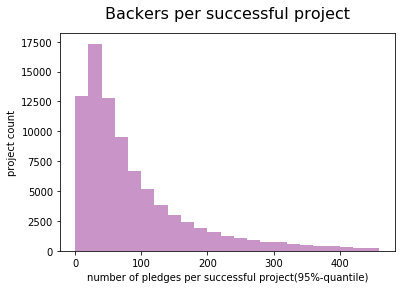

In [42]:
bin_edges = np.arange(0, ks_compl_95['backers_count'].max()+20, 20)
plt.hist(data = ks_success_95, x = 'backers_count', bins= bin_edges, color=pledged_color);
plt.ylabel("Average monthly success rates(%)");
plt.title("Backers per successful project", fontsize=16, pad=15)
plt.xlabel("number of pledges per successful project(95%-quantile)")
plt.ylabel("project count");

Very long tail to the right. 50% of projects reach less than 25 backers.

**How many backers do successful projects have?**

NameError: name 'log_trans' is not defined

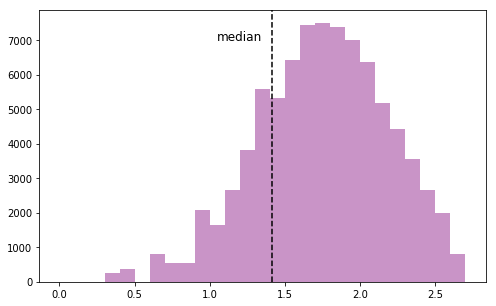

In [43]:
# plot using log scale
plt.figure(figsize=[8,5])

# direct data transform
log_data = np.log10(ks_success_95['backers_count']) 
log_bin_edges = np.arange(0.001, log_data.max()+0.1, 0.1)

y,x, _ = plt.hist(log_data, bins = log_bin_edges, color=pledged_color)

# find the x-axis position of our binned peak by iterating over our y axis  
bin_max = np.where(y == y.max())
bin_max = x[bin_max][0]

# plot median
ax = plt.gca()
ax.axvline(x=np.log10(backers_50), color='black', linestyle="dashed")
ax.annotate("median", xy=(np.log10(backers_50)-0.37, 7000),fontsize=12)

# annotate binned peak
ax.annotate("peak around :\n" + str(round(log_trans(bin_max, inverse=True), 2)) + " backers", fontsize=12,
            xy=(bin_max +0.1,y.max()+20), xytext=(bin_max+0.5,y.max()-700),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# ticks and labels
tick_locs = [1, 3, 8, int(round(backers_50)), int(round(backers_75)), int(round(backers_95))]
plt.xticks(np.log10(tick_locs),tick_locs)
plt.xlabel("backer's count (log scale)")
plt.ylabel("project count")
plt.title("Number of backers per successful project", fontsize=14, pad=15)

plt.show()

accumulation at around 40-60 pledges

#### Are users more likely to pledge in a certain time of a year?

In [84]:
ks_compl_95_latest  = ks_compl_95[ks_compl_95.deadline.dt.year > 2015 ]
ks_success_95_latest  = ks_success_95[ks_success_95.deadline.dt.year > 2015 ] 
ks_fail_95_latest  = ks_fail_95[ks_fail_95.deadline.dt.year > 2015 ] 
print(f"After 2015:\n\
Project count total: {format_num(len(ks_compl_95_latest))}\n\
Project count success: {format_num(len(ks_success_95_latest))}\n\
Project count failed: {format_num(len(ks_fail_95_latest))}")

After 2015:
Project count total: 76,526
Project count success: 41,515
Project count failed: 35,011


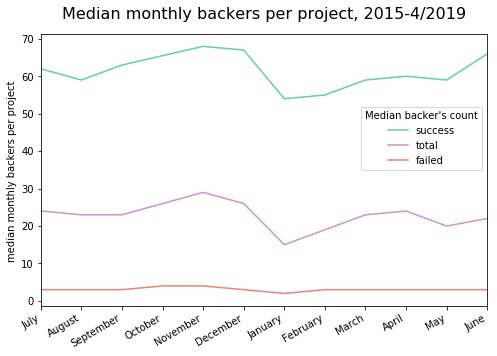

In [46]:
# color settings
cust_color = [cust_green, pledged_color, cust_red]

# how does backer count develop across a year?, due to strong skew, I use median instead of average
backers_total = ks_compl_95_latest['backers_count'].groupby([ks_compl_95_latest.deadline.dt.month]).median()
backers_success = ks_success_95_latest['backers_count'].groupby([ks_success_95_latest.deadline.dt.month]).median()
backers_fail = ks_fail_95_latest['backers_count'].groupby([ks_fail_95_latest.deadline.dt.month]).median()

# add to dataframe
ks_months_95 = pd.DataFrame({'total_backers': backers_total.values, 'success_backers': backers_success.values, 'fail_backers': backers_fail.values})
# ks_months['total_backers'] = backers_total.values
# ks_months['success_backers'] = backers_success.values
# ks_months['fail_backers'] = backers_fail.values

# change order, bring January to center
ks_months_95_sorted = ks_months_95[6:].append(ks_months_95[:6]).reset_index(drop=True)

# plot
ax = ks_months_95_sorted[['success_backers', 'total_backers', 'fail_backers']].plot(color=sns.set_palette(cust_color))

# # figure settings
fig = plt.gcf();
fig.set_size_inches(8, 5);

# # ticks and labels
x_labels = ["July", "August", "September",
         "October", "November", "December", "January", 
            "February", "March", "April", "May", "June"]
plt.xticks(np.arange(0, len(ks_months_95_sorted), 1), x_labels, rotation=30, ha='right');
plt.ylabel("median monthly backers per project ");
plt.title("Median monthly backers per project, 2015-4/2019", fontsize=16, pad=15);
plt.legend(["success", "total", "failed" ], title="Median backer's count", loc=1,  bbox_to_anchor=(0.999, 0.75))
plt.show();

The amount of backers per project peaks in November. Unlike success rates, we don't see a strong peak in March, April, but in June, July. It brings me to the assumption that the success of projects is further determined by the goal of a project and the amount each pledger is contributing.

Investigate how goals develop over a year.

In [ ]:
# eliminate goal outliers
# goal_15_total_norm = ks_15_19[ks_15_19['goal_hist_usd'] < goal_95]
# goal_15_success_norm = df_success_15[df_success_15['goal_hist_usd'] < goal_95]
# goal_15_fail_norm = df_fail_15[df_fail_15['goal_hist_usd'] < goal_95]

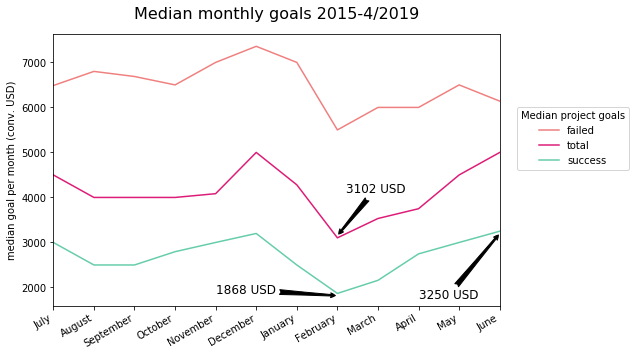

In [47]:
# color settings
cust_color = [cust_red, goal_color, cust_green]

# how does backer count develop across a year?, due to strong skew, I use median instead of average
goal_total = ks_compl_95_latest['goal_hist_usd'].groupby([ks_compl_95_latest.deadline.dt.month]).median()
goal_success = ks_success_95_latest['goal_hist_usd'].groupby([ks_success_95_latest.deadline.dt.month]).median()
goal_fail = ks_fail_95_latest['goal_hist_usd'].groupby([ks_fail_95_latest.deadline.dt.month]).median()

# add to dataframe
ks_months_95['med_total_goal'] = goal_total.values
ks_months_95['med_success_goal'] = goal_success.values
ks_months_95['med_fail_goal'] = goal_fail.values

# change order, bring January to center
ks_months_95_sorted = ks_months_95[6:].append(ks_months_95[:6]).reset_index(drop=True)

# plot
ax = ks_months_95_sorted[['med_fail_goal', 'med_total_goal', 'med_success_goal']].plot(color=sns.set_palette(cust_color))

# # figure settings
fig = plt.gcf();
fig.set_size_inches(8, 5);

# annotate

# minimum total
min_total = int(goal_total.values.min())
ax.annotate(str(min_total) + " USD", fontsize=12, xy=(7 ,min_total + 50), 
            xytext=(7.2, min_total+1000), arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# maximum success
max_success =int(round( goal_success.values.max()))
ax.annotate(str(max_success) + " USD", fontsize=12, xy=(11 , max_success - 50), 
            xytext=(9, max_success-1500), arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# min success
min_success =int(round( goal_success.values.min()))
ax.annotate(str(min_success) + " USD", fontsize=12, xy=(7, min_success - 50), 
            xytext=(4, min_success), arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# ticks and labels
x_labels = ["July", "August", "September",
            "October", "November", "December", "January", 
            "February", "March", "April", "May", "June"]
plt.xticks(np.arange(0, len(ks_months_95_sorted), 1), x_labels, rotation=30, ha='right');
plt.ylabel("median goal per month (conv. USD)");
plt.title("Median monthly goals 2015-4/2019", fontsize=16, pad=15);
plt.legend(["failed", "total", "success" ], title="Median project goals", loc=1,  bbox_to_anchor=(1.3, 0.75))
plt.show();

The graph shows that low project goals are generally more successful than higher project goals. There is a significant drop of median project goals in February to 1,858. In February project's of lower goals seem to be more successful. In December and June and July pledgers seem to be willing to pledge for higher goals.       

In [ ]:
# eliminate pledges outliers
# pledged_15_total_norm = goal_15_total_norm['goal_hist_usd'] < pledged_95]
# goal_15_success_norm = goal_15_success_norm[goal_15_success_norm['goal_hist_usd'] < pledged_95]
# goal_15_fail_norm = goal_15_fail_norm[goal_15_fail_norm['goal_hist_usd'] < pledged_95]

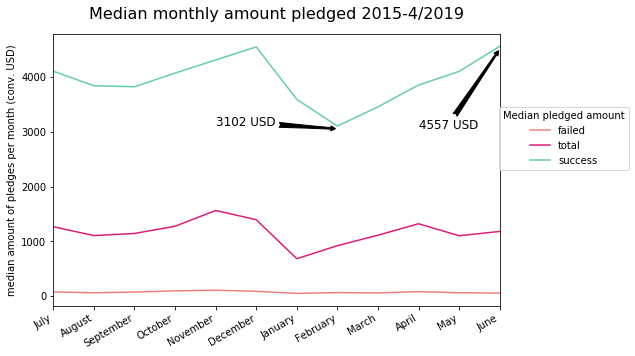

In [69]:
# How do pledges develop over the year/  

# color settings
cust_color = [cust_red, goal_color, cust_green]

# how does backer count develop across a year?, due to strong skew, I use median instead of average
pledged_total = ks_compl_95_latest['pledged_hist_usd'].groupby([ ks_compl_95_latest.deadline.dt.month]).median()
pledged_success = ks_success_95_latest['pledged_hist_usd'].groupby([ks_success_95_latest.deadline.dt.month]).median()
pledged_fail = ks_fail_95_latest['pledged_hist_usd'].groupby([ks_fail_95_latest.deadline.dt.month]).median()

# add to dataframe
ks_months_95['med_total_pledged'] = pledged_total.values
ks_months_95['med_success_pledged'] = pledged_success.values
ks_months_95['med_fail_pledged'] = pledged_fail.values

# change order, bring January to center
ks_months_95_sorted = ks_months_95[6:].append(ks_months_95[:6]).reset_index(drop=True)

# plot
ax = ks_months_95_sorted[['med_fail_pledged', 'med_total_pledged', 'med_success_pledged']].plot(color=sns.set_palette(cust_color))

# # figure settings
fig = plt.gcf();
fig.set_size_inches(8, 5);

# annotate

# maximum success
max_success = int(round(pledged_success.values.max()))
ax.annotate(str(max_success) + " USD", fontsize=12, xy=(11 , max_success - 50), 
            xytext=(9, max_success-1500), arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# min success
min_success =int(round(pledged_success.values.min()))
ax.annotate(str(min_success) + " USD", fontsize=12, xy=(7, min_success - 50), 
            xytext=(4, min_success), arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# ticks and labels
x_labels = ["July", "August", "September",
            "October", "November", "December", "January", 
            "February", "March", "April", "May", "June"]
plt.xticks(np.arange(0, len(ks_months_95_sorted), 1), x_labels, rotation=30, ha='right');
plt.ylabel("median amount of pledges per month (conv. USD)");
plt.title("Median monthly amount pledged 2015-4/2019", fontsize=16, pad=15);
plt.legend(["failed", "total", "success" ], title="Median pledged amount", loc=1,  bbox_to_anchor=(1.3, 0.75))
plt.show();

Pledged for successfu projects seems to be lagging by one month. The low is in February.

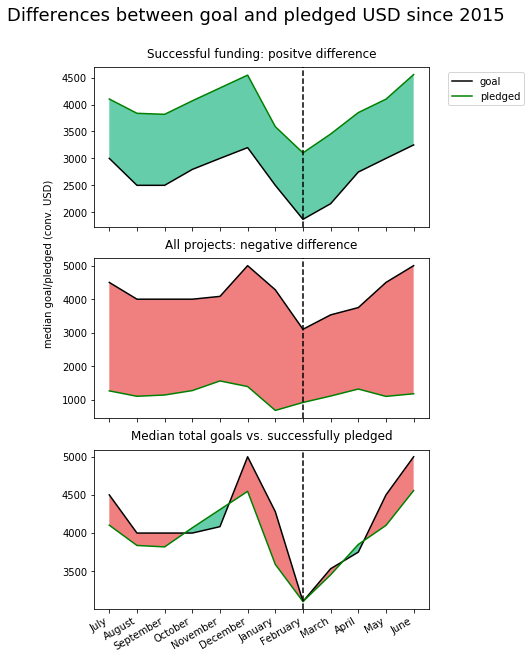

In [184]:
# let's plot goal vs. pledged in figure for a better comparison
fig, (ax, ax1, ax2) = plt.subplots(3, 1, sharex=True)

# data
x = np.arange(0,len(ks_months_95_sorted), 1)
y1 = ks_months_95_sorted['med_success_goal']
y2 =  ks_months_95_sorted['med_success_pledged']
y3 = ks_months_95_sorted['med_total_goal']
y4 =  ks_months_95_sorted['med_total_pledged']

# plot
ax.plot(x, y1, x, y2, color=sns.set_palette(['black', 'green']))
plt.subplots_adjust(bottom=-1)
ax1.plot(x, y3, x, y4, color=sns.set_palette(['black', 'green']))
plt.subplots_adjust(bottom=-1)
ax2.plot(x, y3, x, y2, color=sns.set_palette(['black', 'green']))

ax.axvline(x=7, color='black', linestyle="dashed")
ax1.axvline(x=7, color='black', linestyle="dashed")
ax2.axvline(x=7, color='black', linestyle="dashed")

# ax.annotate("median", xy=(np.log10(backers_50)-0.37, 7000),fontsize=12)

# fill differences
ax.fill_between(x, y1, y2, where=y2 >= y1, facecolor=cust_green, interpolate=True)
ax1.fill_between(x, y3, y4, where=y4 <= y3, facecolor=cust_red, interpolate=True)
ax2.fill_between(x, y3, y2, where=y2 >= y3, facecolor=cust_green, interpolate=True)
ax2.fill_between(x, y3, y2, where=y2 <= y3, facecolor=cust_red, interpolate=True)

# labels and titles
ax.set_title('Successful funding: positve difference', pad=10)
ax1.set_title('All projects: negative difference', pad=10)
ax2.set_title('Median total goals vs. successfully pledged', pad=10)
plt.xticks(np.arange(0, len(ks_months_95_sorted), 1), x_labels, rotation=30, ha='right');
fig.text(0.01, 0.2, "median goal/pledged (conv. USD)", va='center', rotation='vertical')
fig.suptitle('Differences between goal and pledged USD since 2015', y=1.09, fontsize=18 )
plt.legend(["goal", "pledged" ], loc=1,  bbox_to_anchor=(1.3, 3.4))
plt.show()

Overlap of pledges vs goals between October, November and in April. In January goals seem to be quite low, but the amount pledges is laggin, the minimum is actually for projects ending in February. Meaning, there is a difference in behaviour between creators and people who may support projects.

What days are people most likely to pledge (weekday or day of the month)

#### Popularity of project categories over time

What are predictors of a project's failure and success?  
Why are projects usually canceled or suspended?  
What type of tech projects work in Kickstarter?  